In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/tested.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.shape

(418, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Peter, Master. Michael J",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [8]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [9]:
null_percentage = (df.isnull().sum()/len(df)) * 100
print(null_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


## Handling missing values

In [10]:
## Age
## Imputing missing values with median.
df['Age'].fillna(df['Age'].median(),inplace=True)

In [11]:
# Fare
df['Fare'].fillna(df['Fare'].median(),inplace=True)

In [12]:
# Dropping 'Cabin' column since it has 78% missing values.
df.drop('Cabin',axis=1,inplace=True)

In [13]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Data cleaning is done.

## Outlier detection and Handling.

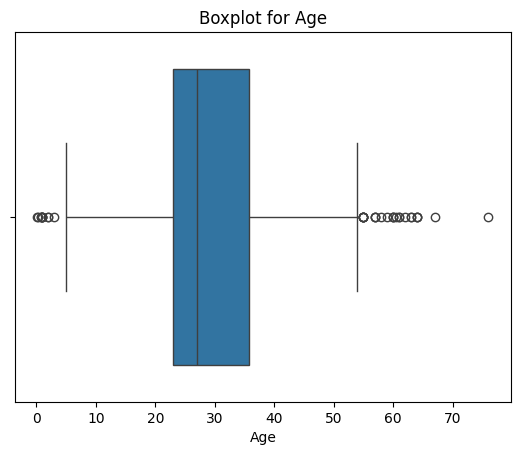

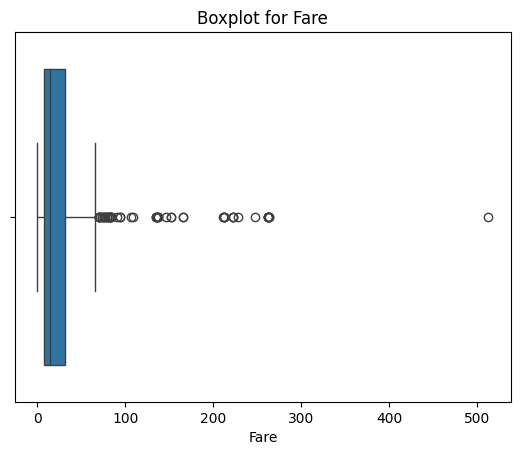

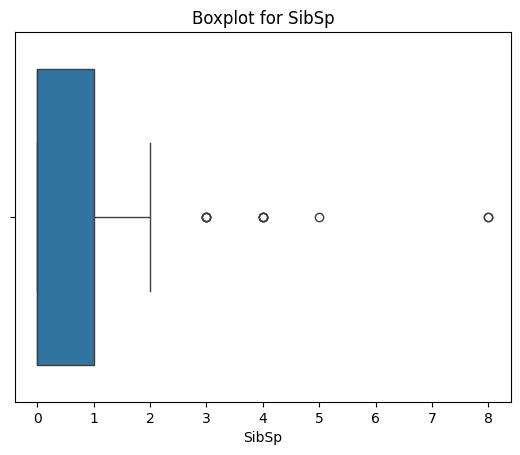

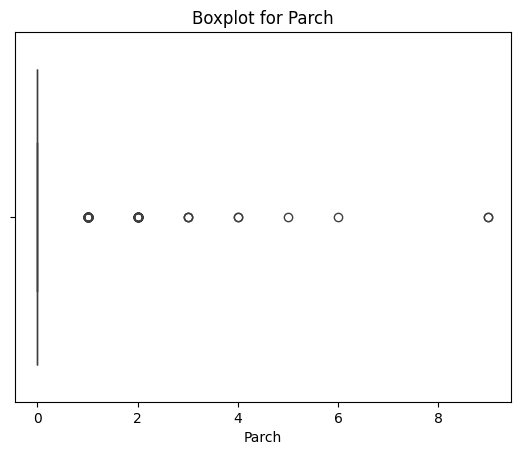

In [14]:
for col in ['Age','Fare','SibSp','Parch']:
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot for {col}')
  plt.show()

In [15]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['Fare'] < lower_limit) | (df['Fare'] > upper_limit)]
print("Number of Fare Outliers:", outliers.shape[0])


Number of Fare Outliers: 55


In [16]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_limit) | (df['Age'] > upper_limit)]
print("Number of Age Outliers:", outliers.shape[0])

Number of Age Outliers: 36


In [17]:
import numpy as np

# --- For Fare ---
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_limit_fare = Q1 - 1.5 * IQR
upper_limit_fare = Q3 + 1.5 * IQR

df['Fare'] = np.where(df['Fare'] > upper_limit_fare, upper_limit_fare,
                      np.where(df['Fare'] < lower_limit_fare, lower_limit_fare, df['Fare']))

# --- For Age ---
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_limit_age = Q1 - 1.5 * IQR
upper_limit_age = Q3 + 1.5 * IQR

df['Age'] = np.where(df['Age'] > upper_limit_age, upper_limit_age,
                     np.where(df['Age'] < lower_limit_age, lower_limit_age, df['Age']))



In [18]:
import numpy as np

df['Fare_log'] = np.log1p(df['Fare'])  # log(1 + Fare)
df['Age_sqrt'] = np.sqrt(df['Age'])


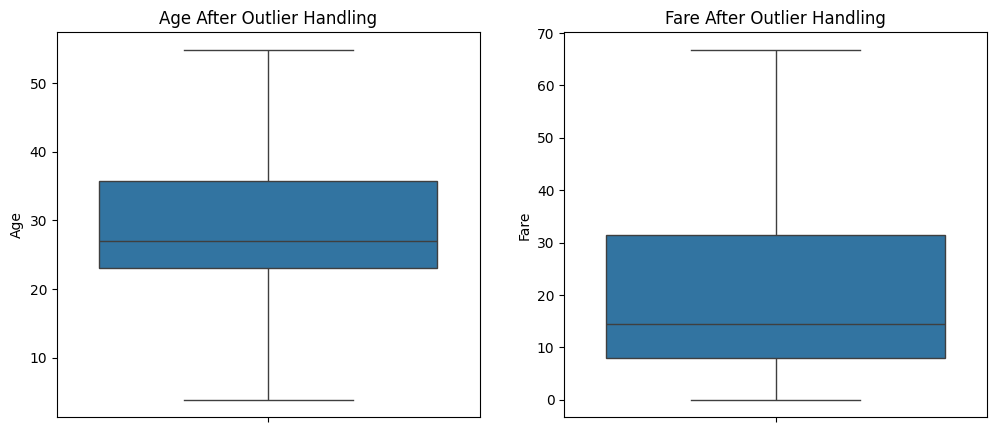

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(df['Age'], ax=axes[0])
axes[0].set_title('Age After Outlier Handling')

sns.boxplot(df['Fare'], ax=axes[1])
axes[1].set_title('Fare After Outlier Handling')

plt.show()


In [20]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_log,Age_sqrt
0,892,0,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.8292,Q,2.178064,5.873670
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.0000,S,2.079442,6.855655
2,894,0,2,"Myles, Mr. Thomas Francis",male,54.875,0,0,240276,9.6875,Q,2.369075,7.407766
3,895,0,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.6625,S,2.268252,5.196152
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.2875,S,2.586824,4.690416


## Converting categorical variables to numerical.

In [21]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [24]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Fare_log,Age_sqrt,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",0,34.500,0,0,330911,7.8292,2.178064,5.873670,True,False
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.000,1,0,363272,7.0000,2.079442,6.855655,False,True
2,894,0,2,"Myles, Mr. Thomas Francis",0,54.875,0,0,240276,9.6875,2.369075,7.407766,True,False
3,895,0,3,"Wirz, Mr. Albert",0,27.000,0,0,315154,8.6625,2.268252,5.196152,False,True
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.000,1,1,3101298,12.2875,2.586824,4.690416,False,True


## Hypothesis testing

 1️⃣**Z-Test — Population Claim**

Question:
The Titanic manufacturer claims that the average passenger age is 30 years. Test this claim using a z-test at a 5% significance level.

Hypotheses:

H₀: μ = 30

H₁: μ ≠ 30

Rationale:
Used when the population standard deviation is known (or approximated). Compares sample mean vs. a population mean.

In [31]:
sample_mean = df['Age'].mean()
pop_mean = 30
pop_std = df['Age'].std()
n = len(df['Age'])

z_stat = (sample_mean - pop_mean) / (pop_std - np.sqrt(n))
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
print(f"Z-statistic = {z_stat:.3f}, p-value = {p_value:.3f}")

Z-statistic = 0.074, p-value = 0.941


2️⃣ **One-Sample t-Test**

Question:
Test whether the average Fare paid by passengers is significantly different from $32.

Hypotheses:

H₀: μ = 32

H₁: μ ≠ 32

Rationale:
Tests whether a sample mean differs from a known or assumed population mean when population σ is unknown.

In [33]:
t_stat, p_value = stats.ttest_1samp(df['Fare'], 32)
print(f"T-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

T-statistic = -7.096, p-value = 0.000


3️⃣ **Independent Two-Sample t-Test**

Question:
Check if male and female passengers paid significantly different Fares.

Hypotheses:

H₀: μ₁ = μ₂ (mean Fare is the same for both genders)

H₁: μ₁ ≠ μ₂

Rationale:
Compares means between two independent groups.

In [34]:
male_fare = df[df['Sex'] == 0]['Fare']
female_fare = df[df['Sex'] == 1]['Fare']

t_stat, p_value = stats.ttest_ind(male_fare, female_fare, equal_var=False)
print(f"T-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")


T-statistic = -4.073, p-value = 0.000


If p < 0.05, significant difference in fare between genders.

4️⃣** Paired t-Test**

Question:
Assume you recorded Age before and after a data correction process (say, filling missing values). Test if the mean Age differs before and after cleaning.

Hypotheses:

H₀: μ₁ = μ₂

H₁: μ₁ ≠ μ₂

Rationale:
Paired test compares two related samples (before vs. after).

In [35]:
# Simulate data: small random noise to represent 'after correction'
df['Age_after'] = df['Age'] + np.random.normal(0, 0.5, len(df))

t_stat, p_value = stats.ttest_rel(df['Age'], df['Age_after'])
print(f"T-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")


T-statistic = -1.363, p-value = 0.174


5️⃣ One-Way ANOVA

Question:
Test if the mean Fare differs across passenger classes (Pclass 1, 2, 3).

Hypotheses:

H₀: μ₁ = μ₂ = μ₃

H₁: At least one mean differs

Rationale:
Used when comparing more than two groups for one continuous variable.

In [36]:
f_stat, p_value = stats.f_oneway(
    df[df['Pclass'] == 1]['Fare'],
    df[df['Pclass'] == 2]['Fare'],
    df[df['Pclass'] == 3]['Fare']
)
print(f"F-statistic = {f_stat:.3f}, p-value = {p_value:.3f}")


F-statistic = 309.329, p-value = 0.000


6️⃣ Two-Way ANOVA

Question:
Check if Fare is affected by both Gender and Passenger Class, and whether there’s an interaction effect between them.

Hypotheses:

H₀: No effect of Gender or Class on Fare

H₁: At least one factor (or their interaction) significantly affects Fare

Rationale:
Examines how two categorical variables jointly influence one continuous variable.

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Fare ~ C(Sex) + C(Pclass) + C(Sex):C(Pclass)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                         sum_sq     df           F        PR(>F)
C(Sex)              2327.394315    1.0   13.348470  2.920198e-04
C(Pclass)         106587.978975    2.0  305.660804  4.039473e-82
C(Sex):C(Pclass)    1032.785982    2.0    2.961705  5.283313e-02
Residual           71834.933898  412.0         NaN           NaN


7️⃣ Chi-Square Test of Independence

Question:
Test if Survival is independent of Gender.

Hypotheses:

H₀: Survival and Gender are independent

H₁: Survival and Gender are dependent

Rationale:
Used for categorical variables to check association.

In [38]:
contingency = pd.crosstab(df['Sex'], df['Survived'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print(f"Chi2 = {chi2:.3f}, p-value = {p:.3f}")


Chi2 = 413.690, p-value = 0.000


8️⃣ Chi-Square Goodness of Fit Test

Question:
Check if the distribution of passengers across classes (Pclass) is uniform.

Hypotheses:

H₀: Passengers are equally distributed across classes

H₁: Distribution is not uniform

Rationale:
Tests whether observed frequencies match expected ones.

In [39]:
observed = df['Pclass'].value_counts().sort_index()
expected = [len(df) / 3] * 3

chi2, p = stats.chisquare(observed, f_exp=expected)
print(f"Chi2 = {chi2:.3f}, p-value = {p:.3f}")


Chi2 = 67.325, p-value = 0.000


9️⃣ Correlation Test (Pearson/Spearman)

Question:
Is there a significant relationship between Age and Fare?

Hypotheses:

H₀: No correlation (ρ = 0)

H₁: Significant correlation (ρ ≠ 0)

Rationale:
Measures linear or monotonic relationship between two continuous variables.

In [40]:
corr, p_value = stats.pearsonr(df['Age'], df['Fare'])
print(f"Correlation = {corr:.3f}, p-value = {p_value:.3f}")


Correlation = 0.350, p-value = 0.000


🔟 Proportion Test (z-test for proportions)

Question:
Check whether the proportion of survivors is equal to 0.4 (40%).

Hypotheses:

H₀: p = 0.4

H₁: p ≠ 0.4

Rationale:
Used for hypothesis testing involving population proportions.

In [41]:
from statsmodels.stats.proportion import proportions_ztest

survived_count = df['Survived'].sum()
n = len(df)
p0 = 0.4

stat, p_value = proportions_ztest(survived_count, n, value=p0)
print(f"Z-statistic = {stat:.3f}, p-value = {p_value:.3f}")


Z-statistic = -1.546, p-value = 0.122
